# Explanaible AI - lime

## RUN

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sklearn

import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

# shap
import shap

# models
from sklearn.linear_model import LinearRegression # lr
from sklearn.linear_model import Ridge # ridge
from sklearn.linear_model import Lasso # lasso
from sklearn.tree import DecisionTreeRegressor # tree
from sklearn.ensemble import GradientBoostingRegressor #gb
from sklearn.ensemble import RandomForestRegressor #rf
from xgboost import XGBRegressor # xgb
from  sklearn.neural_network import MLPRegressor # mlp

### 0. Global params

### 1. Load data

In [2]:
# a classic housing price dataset
X, y = shap.datasets.california(n_points=1000)

In [3]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [4]:
y

array([1.369  , 2.413  , 2.007  , 0.725  , 4.6    , 1.2    , 2.47   ,
       3.369  , 3.397  , 2.656  , 2.379  , 0.922  , 0.795  , 1.375  ,
       2.201  , 2.761  , 3.953  , 3.     , 1.827  , 3.864  , 1.314  ,
       0.742  , 2.31   , 3.941  , 1.761  , 1.734  , 2.021  , 1.708  ,
       0.926  , 0.57   , 4.657  , 3.726  , 4.     , 1.539  , 1.     ,
       1.587  , 1.421  , 1.396  , 3.197  , 1.313  , 1.107  , 0.849  ,
       0.704  , 2.76   , 1.58   , 0.542  , 1.232  , 1.162  , 1.592  ,
       2.155  , 2.781  , 0.66   , 2.929  , 1.712  , 2.75   , 0.962  ,
       5.00001, 1.676  , 1.829  , 2.231  , 1.733  , 1.891  , 1.177  ,
       2.468  , 0.618  , 0.934  , 0.557  , 3.905  , 2.03   , 0.889  ,
       5.00001, 1.703  , 1.55   , 0.579  , 5.00001, 1.083  , 3.506  ,
       2.032  , 2.214  , 1.553  , 2.706  , 2.     , 0.875  , 2.045  ,
       1.969  , 1.839  , 0.786  , 1.458  , 0.767  , 0.985  , 2.217  ,
       1.713  , 0.618  , 2.747  , 0.75   , 2.042  , 3.75   , 2.408  ,
       1.391  , 3.90

In [5]:
X100 = shap.utils.sample(X, 100)  # 100 instances for use as the background distribution
X100

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12953,3.7813,15.0,5.620058,1.013500,2868.0,2.765670,38.70,-121.28
18537,4.3000,20.0,6.270677,1.137845,981.0,2.458647,36.98,-122.00
13337,3.9107,27.0,5.572816,1.000000,321.0,3.116505,34.04,-117.68
12651,1.6521,36.0,4.068477,1.121606,2460.0,2.904368,38.52,-121.44
19986,2.3152,25.0,5.412844,1.055046,1424.0,3.266055,36.21,-119.32
...,...,...,...,...,...,...,...,...
6232,3.3523,25.0,4.997245,1.112948,1187.0,3.269972,34.07,-117.94
2782,1.2049,17.0,4.337500,1.206250,775.0,2.421875,32.74,-114.66
12601,1.9837,37.0,4.786517,1.014045,902.0,2.533708,38.53,-121.48
2198,7.5000,8.0,6.564885,0.946565,1111.0,2.826972,36.85,-119.88


### 2. Train models

In [6]:
# train lr
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [7]:
# explore coeficients linear regression
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", lr.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


In [8]:
# train rf simple
param_n_trees = 3
rf_simple = RandomForestRegressor(n_estimators = param_n_trees,
                                  random_state = 42,
                                 min_samples_split = 0.2,
                                    min_samples_leaf = 0.1)
                                   #max_depth = 2)
rf_simple.fit(X, y)

RandomForestRegressor(min_samples_leaf=0.1, min_samples_split=0.2,
                      n_estimators=3, random_state=42)

In [17]:
# the sum of shapley values
shapley_values_instance_sum = shap_values[sample_ind].values.sum()
shapley_values_instance_sum

-0.2227696588157933

In [18]:
# the base value
shapley_values_instance_base_value = shap_values[sample_ind].base_values
shapley_values_instance_base_value

1.9035338119654202

In [19]:
# calculate prediction from shapley values
shapley_values_prediction = shapley_values_instance_base_value + shapley_values_instance_sum
shapley_values_prediction

1.680764153149627

In [20]:
# calculate prediction from model.predict()
instance = X.iloc[[sample_ind], :]
lr.predict(instance)

array([1.68076415])

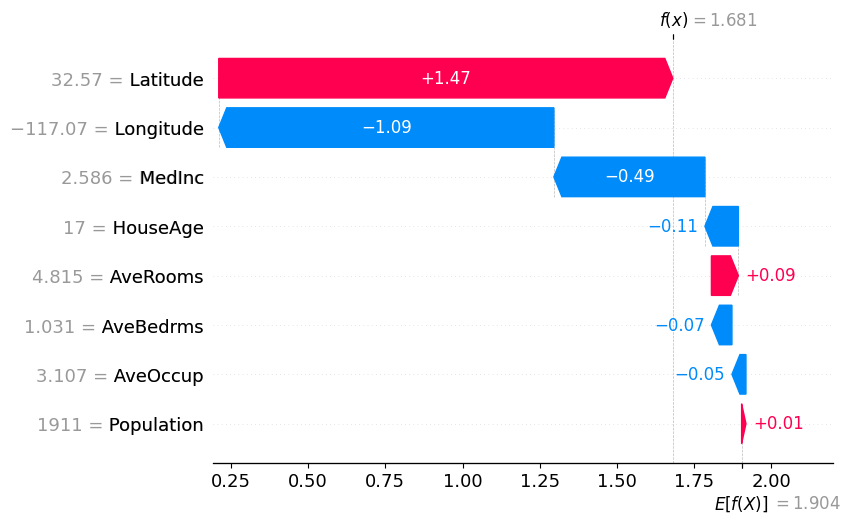

In [21]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

Spanish - explication 2

- Utiliza para visualizar la contribución de cada característica a la diferencia entre el valor esperado del modelo y el valor de predicción para una instancia de datos específica.

 - En un gráfico de cascada de SHAP, **cada barra representa la contribución de una característica específica al cambio en la predicción del modelo en comparación con la predicción promedio del modelo.** Las barras se suman para obtener la predicción final del modelo para esa instancia de datos en particular.

- Esto puede ser útil para comprender cómo cada característica influye en las predicciones del modelo para casos individuales, lo que puede ayudar a interpretar y explicar las predicciones del modelo de manera más detallada.

**Entendimiento gráfico**
- Las feautures están ordenandas del que más impacta al que menos impacta de forma global
- Cada punto representa una observación
- El color del punto representa el valor de la observación, un color rojo representa un valor alto, mientras que un color azul representa un valor más bajo
- Si está a la izquierda tiene un shap value negativo (tiene una contribución negativa en la predicción del modelo en comparación con la predicción promedio del modelo)

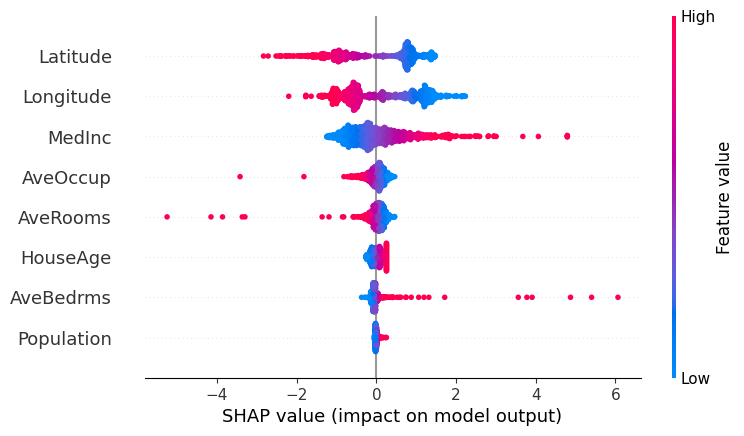

In [22]:
# beeswarm
shap.plots.beeswarm(shap_values)